In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import  roc_curve, auc, RocCurveDisplay, classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [2]:
# Load pre-processed data
FMG_CRC_BA = pd.read_csv("FMG_CRC_BA.csv", delimiter=",")
FMG_CRC_BA

,g__Acetanaerobacterium,g__Acetatifactor,g__Acetivibrio,g__Acidaminococcus,g__Actinobacillus,g__Actinomyces,g__Adlercreutzia,g__Aggregatibacter,g__Alistipes,g__Alkalitalea,...,g__Zobellella,g__Zoogloea,Group,Stage,Age,Gender,BMI,Brinkman Index,Alcohol,Tumor location
0,0.000016,0.000158,0.000519,0.000093,0.000051,0.000251,0.000856,0.000018,0.000000,0.000007,...,0.000040,0.000043,Healthy,-,65,M,26.5625,660,0,-
1,0.000253,0.000012,0.000380,0.002880,0.000033,0.000270,0.000492,0.000002,0.003794,0.000000,...,0.000021,0.000000,Healthy,-,40,M,25,400,993,-
2,0.000375,0.000000,0.000462,0.000072,0.000000,0.000132,0.000568,0.000002,0.003503,0.000000,...,0.000053,0.000024,Healthy,-,67,F,20.17325264,0,0,-
3,0.000003,0.000032,0.000079,0.002272,0.001376,0.000160,0.000273,0.000682,0.003374,0.000000,...,0.000088,0.000012,Healthy,-,77,M,24.4646016,300,813,-
4,0.000007,0.000026,0.000646,0.000429,0.000000,0.000219,0.000051,0.000000,0.000926,0.000051,...,0.000075,0.000000,Healthy,-,64,F,21.1552942,0,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0.000053,0.000000,0.000279,0.000027,0.000000,0.000082,0.000447,0.000000,0.008111,0.000009,...,0.000000,0.000014,HS,-,51,F,18.08021039,90,669.9,-
612,0.000178,0.000003,0.000189,0.003788,0.000198,0.000067,0.000000,0.000014,0.044267,0.000018,...,0.000000,0.000000,HS,Normal,42,F,17.94181725,110,120,-
613,0.000022,0.000028,0.000012,0.000000,0.000047,0.000281,0.000000,0.000000,0.000000,0.000000,...,0.000164,0.000000,HS,-,70,F,20.504934,0,18.26,-
614,0.000000,0.000020,0.000122,0.000018,0.000011,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000008,0.000000,HS,-,65,F,27.09925101,0,73.6929,-


In [3]:

stage_mapping = { # Map stage I to IV into two groups
    'Stage_I_II': 'Early Stage', 
    'Stage_III_IV': 'Late Stage',
}

FMG_CRC_BA['Group'] = FMG_CRC_BA['Group'].replace(stage_mapping)
FMG_CRC_BA = FMG_CRC_BA[FMG_CRC_BA['Group'] != 'Healthy']

FMG_CRC_BA

,g__Acetanaerobacterium,g__Acetatifactor,g__Acetivibrio,g__Acidaminococcus,g__Actinobacillus,g__Actinomyces,g__Adlercreutzia,g__Aggregatibacter,g__Alistipes,g__Alkalitalea,...,g__Zobellella,g__Zoogloea,Group,Stage,Age,Gender,BMI,Brinkman Index,Alcohol,Tumor location
251,0.005134,0.000000,0.001712,0.000043,0.000000,0.000031,0.001090,0.000000,0.049392,0.000021,...,0.000047,0.000000,MP,-,41,F,19.921875,500,687,-
252,0.000012,0.000177,0.000044,0.000013,0.000000,0.000228,0.000021,0.000000,0.000039,0.000119,...,0.000023,0.000033,MP,-,54,M,22.40817899,680,549.9,-
253,0.000178,0.000051,0.000117,0.000000,0.000000,0.000095,0.000068,0.000000,0.006120,0.000005,...,0.000009,0.000023,MP,-,69,M,26.171875,1080,1656,-
254,0.000040,0.000015,0.000215,0.000035,0.000000,0.000210,0.001364,0.000004,0.002800,0.000006,...,0.000088,0.000031,MP,-,67,F,22.0603538,235,0,-
255,0.000142,0.000018,0.000431,0.000014,0.000002,0.000062,0.000313,0.000002,0.008647,0.000021,...,0.000000,0.000012,MP,-,72,M,23.66524436,1400,369.9,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0.000053,0.000000,0.000279,0.000027,0.000000,0.000082,0.000447,0.000000,0.008111,0.000009,...,0.000000,0.000014,HS,-,51,F,18.08021039,90,669.9,-
612,0.000178,0.000003,0.000189,0.003788,0.000198,0.000067,0.000000,0.000014,0.044267,0.000018,...,0.000000,0.000000,HS,Normal,42,F,17.94181725,110,120,-
613,0.000022,0.000028,0.000012,0.000000,0.000047,0.000281,0.000000,0.000000,0.000000,0.000000,...,0.000164,0.000000,HS,-,70,F,20.504934,0,18.26,-
614,0.000000,0.000020,0.000122,0.000018,0.000011,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000008,0.000000,HS,-,65,F,27.09925101,0,73.6929,-


In [4]:
class_counts = FMG_CRC_BA['Group'].value_counts()
print(class_counts)

Group
Early Stage    111
Late Stage      74
Stage_0         73
MP              67
HS              40
Name: count, dtype: int64


In [5]:
# Prepare features and target variable
X = FMG_CRC_BA.drop(['Group', 'Stage', 'Age', 'Gender', 'BMI', 'Brinkman Index', 'Alcohol',
       'Tumor location'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
y = FMG_CRC_BA['Group']
print("Unique values of y:", np.unique(y))
le = LabelEncoder()
y = le.fit_transform(y)
y
print("Unique values of y:", np.unique(y))
print("Shape of y:", X_scaled.shape)
print("Shape of y:", y.shape)

Unique values of y: ['Early Stage' 'HS' 'Late Stage' 'MP' 'Stage_0']
Unique values of y: [0 1 2 3 4]
Shape of y: (365, 258)
Shape of y: (365,)


In [6]:
# Oversampling to ensure class balance
from imblearn.over_sampling import SMOTE
#oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
#X_scaled, y = oversampler.fit_resample(X_scaled,y)

sm = SMOTE(sampling_strategy='not majority', k_neighbors= 5, random_state=42)
X_scaled, y = sm.fit_resample(X_scaled, y)

print(X_scaled.shape)
print(y.shape)

(555, 258)
(555,)


Test on the single model:

Best Parameters: {'alpha': 1, 'colsample_bytree': 0.8, 'eta': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best Score: 0.59011746680286
Test Set Accuracy: 0.5945945945945946


<Figure size 800x600 with 0 Axes>

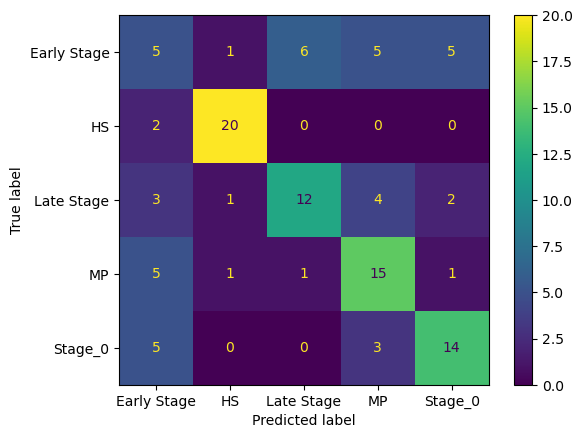

              precision    recall  f1-score   support

 Early Stage       0.25      0.23      0.24        22
          HS       0.87      0.91      0.89        22
  Late Stage       0.63      0.55      0.59        22
          MP       0.56      0.65      0.60        23
     Stage_0       0.64      0.64      0.64        22

    accuracy                           0.59       111
   macro avg       0.59      0.59      0.59       111
weighted avg       0.59      0.59      0.59       111



In [7]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

# Define parameters for XGBoost model
params = {
    'max_depth': [3, 4, 5],
    'eta': [0.01, 0.1],
    'alpha': [1],
    'colsample_bytree': [0.8],
    'subsample': [0.8, 0.9],
    'n_estimators':[100],
}

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=5, eval_metric='mlogloss', seed=42)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter set selection
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='accuracy', cv=cv)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate on test set
test_score = grid_search.best_estimator_.score(X_test, y_test)
print("Test Set Accuracy:", test_score)

y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Early Stage', 'HS', 'Late Stage', 'MP', 'Stage_0'])
plt.figure(figsize=(8, 6))
cm_display.plot()
plt.show()

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=['Early Stage', 'HS', 'Late Stage', 'MP', 'Stage_0'])
print(report)

In [8]:
from sklearn.metrics import roc_auc_score

# Train XGBoost model with best parameters for calculating feature importances
best_xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=5, eval_metric='mlogloss', **best_params)
y_score = best_xgb_model.fit(X_train, y_train).predict_proba(X_test)

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.86
Macro-averaged One-vs-Rest ROC AUC score:
0.84


C:\Users\Zhongyuan\AppData\Local\Temp\ipykernel_14112\3495227874.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', lw=2, color='black', label='Chance level (AUC = 0.5)')


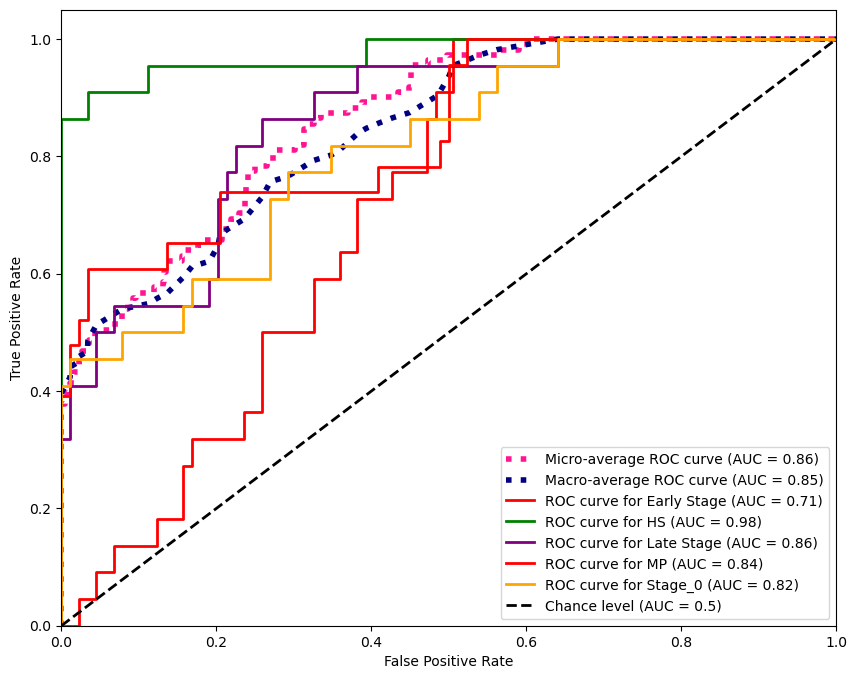

In [9]:
# Binarize the output labels
y_test_binarized = label_binarize(y_test, classes=np.arange(5))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(5)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(5):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= 5

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = ['red', 'green', 'purple', 'red', 'orange']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve for {0} (AUC = {1:0.2f})'
             ''.format(le.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2, color='black', label='Chance level (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

C:\Users\Zhongyuan\AppData\Local\Temp\ipykernel_14112\6200700.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[top_20_indices], y=top_20_feature_names, palette="viridis")


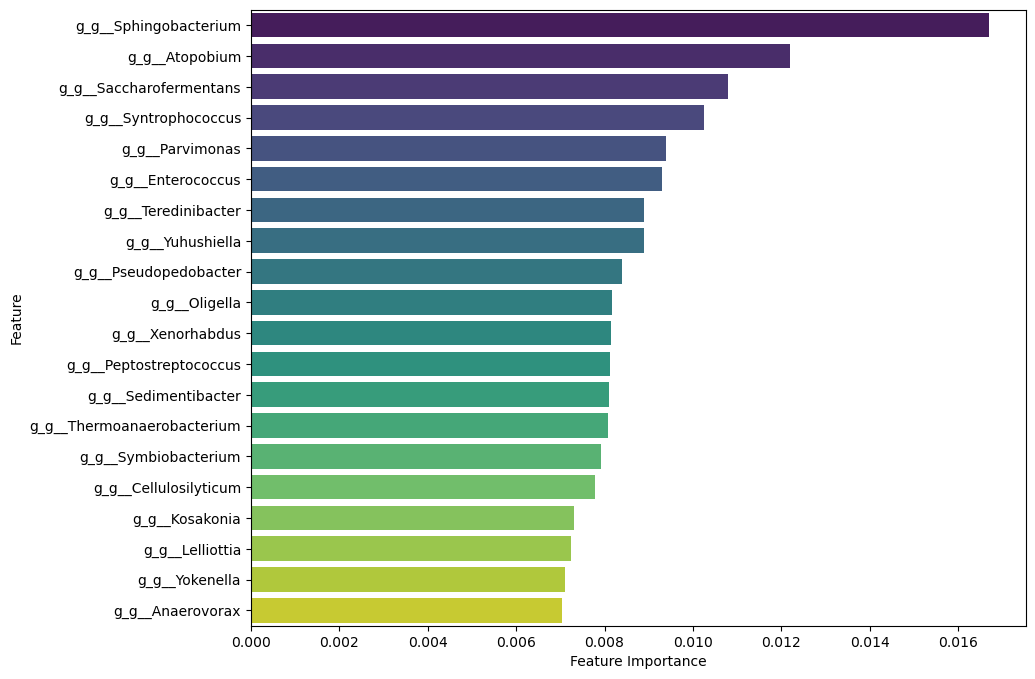

In [10]:
# Train XGBoost model with best parameters for calculating feature importances
best_xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=5, eval_metric='mlogloss', **best_params)
best_xgb_model.fit(X_train, y_train)

feature_importances = best_xgb_model.feature_importances_
top_20_indices = feature_importances.argsort()[::-1][:20]
feature_names = X.columns

# Add the prefix "g_" to the top 20 feature names
top_20_feature_names = ["g_" + feature_names[i] for i in top_20_indices]

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances[top_20_indices], y=top_20_feature_names, palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

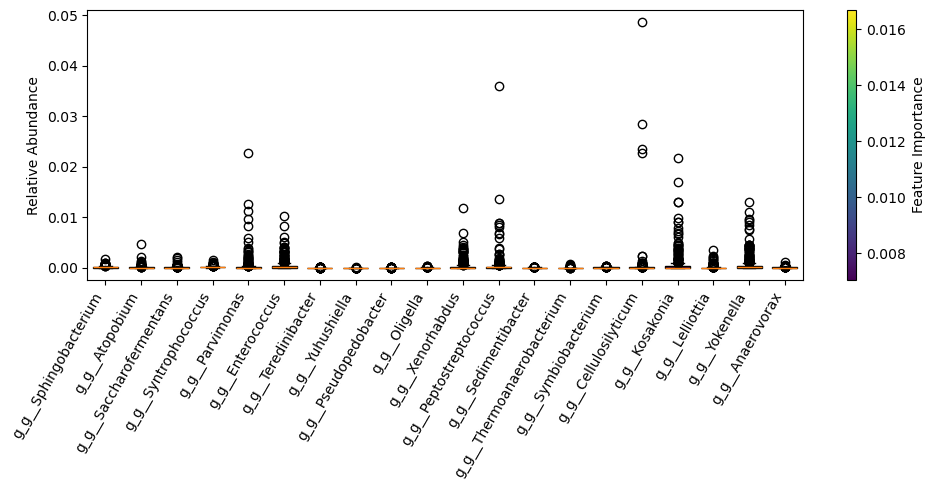

In [11]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Normalize feature importances
norm = Normalize(vmin=min(feature_importances[top_20_indices]), vmax=max(feature_importances[top_20_indices]))
cmap = plt.get_cmap('viridis')  # Choose a colormap
colors = [cmap(norm(importance)) for importance in feature_importances[top_20_indices]]

data = {}
scaled_X = np.log(X+1)

for original_name, prefixed_name in zip(X.columns[top_20_indices], top_20_feature_names):
    data[prefixed_name] = scaled_X[original_name]

fig, ax = plt.subplots(figsize=(10, 5))

# Plot each box with the corresponding color based on feature importance
for i, (key, value) in enumerate(data.items()):
    box = ax.boxplot(value, positions=[i + 1], widths=0.7, patch_artist=True,
                     boxprops=dict(facecolor=colors[i], color='black'),
                     whiskerprops=dict(color='black'))

ax.set_ylabel('Relative Abundance', fontsize=10)
ax.set_xticks(range(1, len(data) + 1))
ax.set_xticklabels(data.keys(), rotation=60, ha='right', fontsize=10)
plt.tight_layout()

# Add colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for colorbar, not for plotting
cbar = plt.colorbar(sm, ax=ax, aspect=30)
cbar.set_label('Feature Importance', fontsize=10)

plt.show()

EMC_CanML:

In [12]:
#Evaluate the robustness of ML framework

from sklearn.metrics import precision_score, recall_score, f1_score

# Define parameters for XGBoost model
params = {
    'max_depth': [3, 4, 5],
    'eta': [0.01, 0.1],
    'alpha': [1], # Include L1 regularization
    'colsample_bytree': [0.8],
    'subsample': [0.8, 0.9],
    'n_estimators':[100],
}


xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=5, eval_metric='mlogloss', seed=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

n_iterations = 20
robustness_train_scores = []
robustness_test_scores = []
robustness_auroc = []
precision_scores = []
recall_scores = []
f1_scores = []
important_features = []

for i in range(n_iterations):

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=i, stratify=y)

    grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='accuracy', cv=cv)
    grid_search.fit(X_train, y_train)

    # Evaluate the model on the training data of the resampled set
    train_score = grid_search.best_score_
    robustness_train_scores.append(train_score)

    # Evaluate the model on the test data of the resampled set
    y_pred = grid_search.best_estimator_.predict(X_test)
    test_score = accuracy_score(y_test, y_pred)
    robustness_test_scores.append(test_score)
    
    # Calculate AUROC score
    y_test_proba = grid_search.best_estimator_.predict_proba(X_test)
    test_auroc = roc_auc_score(y_test, y_test_proba, multi_class='ovr', average='macro')
    robustness_auroc.append(test_auroc)

# Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Extract the best model's parameters and feature importances
    best_params = grid_search.best_params_
    best_xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=5, eval_metric='mlogloss', **best_params)
    best_xgb_model.fit(X_train, y_train)

    feature_importances = best_xgb_model.feature_importances_
    top_20_indices = feature_importances.argsort()[::-1][:20]
    feature_names = X.columns
    top_20_features = feature_names[top_20_indices]
    important_features.extend(top_20_features)


robustness_train_mean = np.mean(robustness_train_scores)
robustness_train_std = np.std(robustness_train_scores)

robustness_test_mean = np.mean(robustness_test_scores)
robustness_test_std = np.std(robustness_test_scores)

robustness_auroc_mean = np.mean(robustness_auroc)
robustness_auroc_std = np.std(robustness_auroc)

# Calculate mean and standard deviation for precision, recall, and F1 score
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)

print("Train Mean Accuracy:", robustness_train_mean)
print("Train Std Accuracy:", robustness_train_std)
print("Test Mean Accuracy:", robustness_test_mean)
print("Test Std Accuracy:", robustness_test_std)
print("Mean AUROC:", robustness_auroc_mean)
print("Std AUROC:", robustness_auroc_std)
print("Mean Precision:", mean_precision)
print("Std Precision:", std_precision)
print("Mean Recall:", mean_recall)
print("Std Recall:", std_recall)
print("Mean F1 Score:", mean_f1)
print("Std F1 Score:", std_f1)


Train Mean Accuracy: 0.5824463738508683
Train Std Accuracy: 0.01702718470149283
Test Mean Accuracy: 0.6108108108108108
Test Std Accuracy: 0.04231358041735993
Mean AUROC: 0.8662406737131946
Std AUROC: 0.022841548953813722
Mean Precision: 0.6071732543474118
Std Precision: 0.04663470755243399
Mean Recall: 0.6106324110671937
Std Recall: 0.04242138019297482
Mean F1 Score: 0.6036862800588711
Std F1 Score: 0.045170948438554806


In [13]:
print(f"Train_accuracy_scores: {robustness_train_scores}" )
print(f"Test_accuracy_scores: {robustness_test_scores}" )
print(f"AUROC_scores: {robustness_auroc}" )
print(f"precision_scores: {precision_scores}" )
print(f"recall_scores: {recall_scores}" )
print(f"f1_scores: {f1_scores}" )

Train_accuracy_scores: [0.5811797752808989, 0.6011491317671093, 0.5651685393258428, 0.5901685393258427, 0.5811797752808989, 0.5947395301327886, 0.5968335035750766, 0.5991573033707865, 0.5833248212461696, 0.5697906026557711, 0.6125893769152195, 0.5448672114402451, 0.5586567926455567, 0.5676966292134831, 0.6079673135852912, 0.5697650663942798, 0.5721654749744637, 0.5946629213483147, 0.572114402451481, 0.5857507660878447]
Test_accuracy_scores: [0.6486486486486487, 0.5945945945945946, 0.6126126126126126, 0.5855855855855856, 0.5945945945945946, 0.6756756756756757, 0.6486486486486487, 0.5405405405405406, 0.6306306306306306, 0.6216216216216216, 0.6576576576576577, 0.7027027027027027, 0.6396396396396397, 0.5945945945945946, 0.5675675675675675, 0.5675675675675675, 0.5495495495495496, 0.5675675675675675, 0.5855855855855856, 0.6306306306306306]
AUROC_scores: [0.8858606830394813, 0.8537915796953414, 0.8675023315717013, 0.8613769596305014, 0.8434171958964338, 0.8912255184971356, 0.8809588311053871,

In [14]:
# The list of important features
print("Total number of selected features:", len(important_features))
important_features = pd.DataFrame(important_features)
important_features.to_csv('FI_XGB_FMG_Stage.csv', index=False)

Total number of selected features: 400
